In [1]:
import pandas as pd
#dataset
#행복도 랭킹, 행복도 점수, GDP, 도와줄 사람, 건강, 자유, 기부문화, 부패인식, 불행한 나라기존 우리나라가 좋은지
data_2017 = pd.read_csv('./archive/2017.csv')

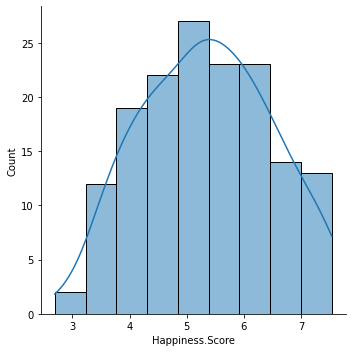

In [13]:
import seaborn as sns

sns.displot(data_2017['Happiness.Score'],kde = True)

<ipython-input-50-171144a9925e>:8: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot:>

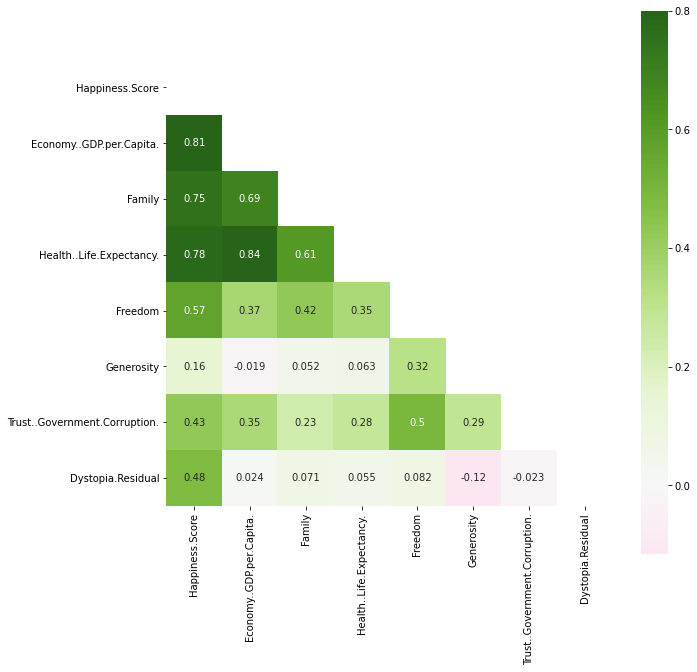

In [50]:
data_2017 = pd.read_csv('./archive/2017.csv')
data_2017 = data_2017.drop([ 'Happiness.Rank', 'Country', 'Whisker.high', 'Whisker.low'],axis=1)
corrmat_2017 = data_2017.corr()
# sns.color_palette('Paired')
# sns.heatmap(corrmat_2017, vmax = 0.8, square=True, cmap='PiYG', center = 0)


mask = np.zeros_like(corrmat_2017, dtype = np.bool)
#삼각형으로 그려준다 np.triu_indices_from(mask)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (10,10))
sns.heatmap(corrmat_2017, annot=True, vmax = .8, square=True, cmap='PiYG', center = 0, mask = mask)

#돈하고 건강이 가장 중요하다는 것이 볼 수 있다 (Happy_score  (Economy, Health))

In [52]:
data_2017 = pd.read_csv('./archive/2017.csv')

y = data_2017['Happiness.Score']
X = data_2017.drop(['Happiness.Score', 'Happiness.Rank', 'Country', 'Whisker.high', 'Whisker.low'], axis=1)

Coefficients: 
 [1.0000158  0.99988359 1.00010937 1.00007047 1.00010167 0.99977243
 0.99993477]


Text(0, 0.5, 'Predicted Y')

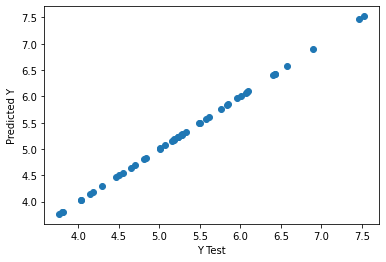

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print('Coefficients: \n', lm.coef_)
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [54]:
import plotly.graph_objs as go
data = dict(type = 'choropleth', locations = data_2017['Country'], locationmode = 'country names',
           z = data_2017['Happiness.Rank'],text = data_2017['Country'],colorbar = {'title':'Happiness'})
layout = dict(title="Global Happiness 2017", geo = dict(showframe = False))
chromap3 = go.Figure(data = [data], layout = layout)
iplot = chromap3
iplot.show()


In [32]:
import numpy as np
import matplotlib.pyplot as plt

df_2015 = pd.read_csv("./archive/2015.csv")
df_2017 = pd.read_csv("./archive/2017.csv").drop(['Whisker.high', 'Whisker.low', 'Happiness.Rank'],axis=1)
df_2015 = df_2015[['Country', 'Region']]
df = pd.merge(df_2015, df_2017, on='Country')


,Country,Region
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America
...,...,...
153,Rwanda,Sub-Saharan Africa
154,Benin,Sub-Saharan Africa
155,Syria,Middle East and Northern Africa
156,Burundi,Sub-Saharan Africa


<ipython-input-29-83e7188833ce>:13: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot:>

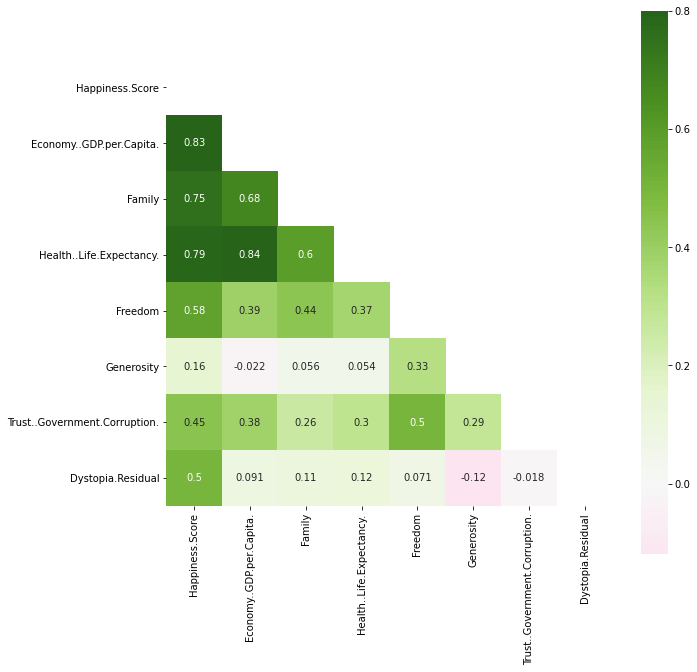

In [29]:
corrmat = df.corr()
mask = np.zeros_like(corrmat, dtype = np.bool)
#삼각형으로 그려준다 np.triu_indices_from(mask)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (10,10))
sns.heatmap(corrmat, annot=True, vmax = .8, square=True, cmap='PiYG', center = 0, mask = mask)

<AxesSubplot:title={'center':'Asia'}>

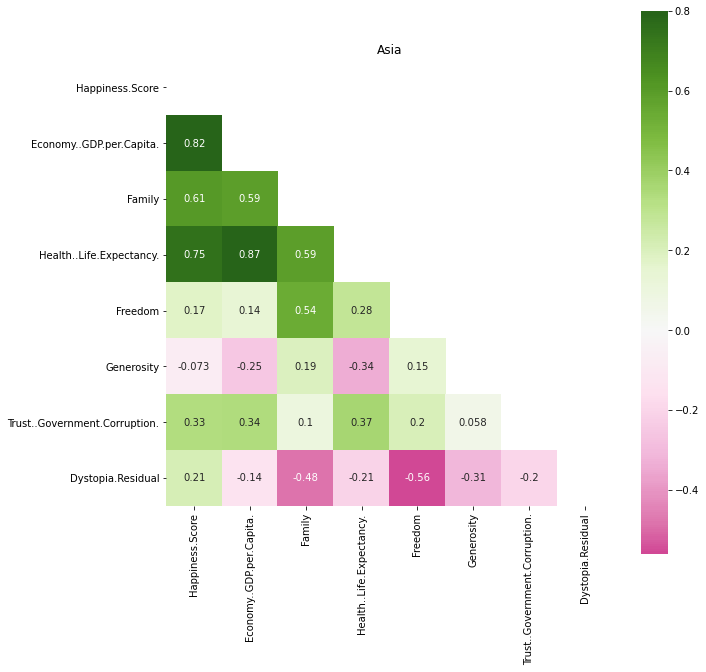

In [33]:

#상관관계 
corrmat = df[df['Region'].str.contains('Asia')].corr()
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.set_title('Asia')
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, cmap="PiYG", center=0, mask=mask)

<AxesSubplot:title={'center':'Europe'}>

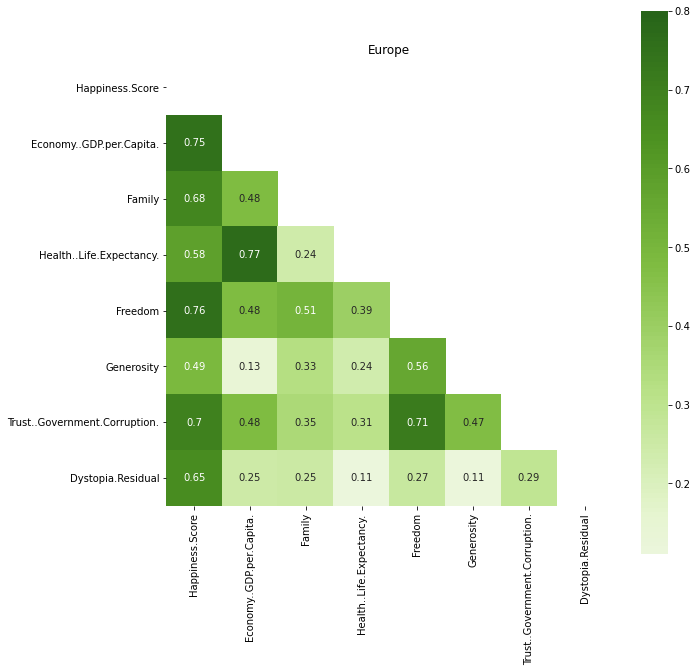

In [36]:
corrmat = df[df['Region'].str.contains('Europe')].corr()
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.set_title('Europe')
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, cmap="PiYG", center=0, mask=mask)

<AxesSubplot:title={'center':'Africa'}>

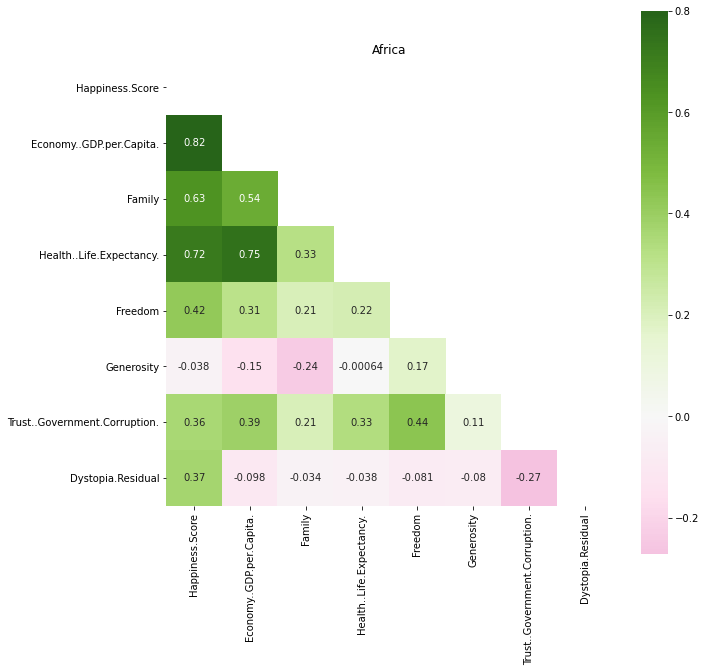

In [37]:
corrmat = df[df['Region'].str.contains('Africa')].corr()
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.set_title('Africa')
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, cmap="PiYG", center=0, mask=mask)

In [38]:
kcj = df[df['Country'].str.contains('Korea|China|Japa')]
kcj

,Country,Region,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
42,Japan,Eastern Asia,5.920,1.416915,1.436338,0.913476,0.505626,0.120573,0.163761,1.363224
43,South Korea,Eastern Asia,5.838,1.401678,1.128274,0.900214,0.257922,0.206674,0.063283,1.880378
79,China,Eastern Asia,5.273,1.081166,1.160837,0.741416,0.472788,0.028807,0.022794,1.764939


<AxesSubplot:xlabel='Country', ylabel='Happiness.Score'>

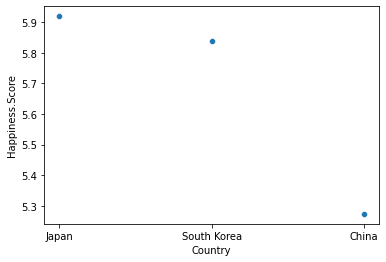

In [39]:
sns.scatterplot(x = 'Country', y = "Happiness.Score", data = kcj)

In [41]:
y = data_2017['Happiness.Score']
X = data_2017.drop(['Happiness.Score', 'Happiness.Rank', 'Country', 'Whisker.high', 'Whisker.low'], axis=1)